In [5]:
import pandas as pd
import numpy as np

## EDA

In [6]:
# import the dataset
dataset_df = pd.read_csv('../data/dataset.csv')

In [7]:
dataset_df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are 4930 patients

In [8]:
dataset_df.shape

(4930, 18)

In [9]:
dataset_df = dataset_df.apply(lambda col: col.str.strip())

I could get a list from the symptom_severity file, but in a real project that file may not always be present, so I will extract the list of symptoms from the dataset

In [10]:
test = pd.get_dummies(dataset_df.filter(regex='Symptom'), prefix='', prefix_sep='')

In [11]:
test.head()

,acidity,back_pain,bladder_discomfort,breathlessness,burning_micturition,chest_pain,chills,constipation,continuous_sneezing,cough,...,congestion,phlegm,red_spots_over_body,blood_in_sputum,chest_pain,loss_of_smell,blood_in_sputum,loss_of_smell,muscle_pain,muscle_pain
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
test = test.groupby(test.columns, axis=1).agg(np.max)

In [13]:
clean_df = pd.merge(test,dataset_df['Disease'], left_index=True, right_index=True)

In [14]:
clean_df

,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,bladder_discomfort,...,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin,Disease
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4925,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Covid
4926,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Covid
4927,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Covid
4928,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Covid


In [15]:
clean_df.columns.get_loc('acidity')

2

In [16]:
test = np.zeros((1,132))

In [17]:
test[0,12]

0.0

Machine learning model: XGBoost random forest classifier

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import preprocessing

In [19]:
X_data = clean_df.iloc[:,:-1]
y_data = clean_df.iloc[:,-1]

# Convert y to categorical values
y_data = y_data.astype('category')

In [20]:
X_data.shape

(4930, 133)

In [21]:
y_data.shape

(4930,)

In [22]:
le = preprocessing.LabelEncoder()
le.fit(y_data)

LabelEncoder()

In [23]:
y_data.cat.categories

Index(['(vertigo) Paroymsal  Positional Vertigo', 'AIDS', 'Acne',
       'Alcoholic hepatitis', 'Allergy', 'Arthritis', 'Bronchial Asthma',
       'Cervical spondylosis', 'Chicken pox', 'Chronic cholestasis',
       'Common Cold', 'Covid', 'Dengue', 'Diabetes',
       'Dimorphic hemmorhoids(piles)', 'Drug Reaction', 'Fungal infection',
       'GERD', 'Gastroenteritis', 'Heart attack', 'Hepatitis B', 'Hepatitis C',
       'Hepatitis D', 'Hepatitis E', 'Hypertension', 'Hyperthyroidism',
       'Hypoglycemia', 'Hypothyroidism', 'Impetigo', 'Jaundice', 'Malaria',
       'Migraine', 'Osteoarthristis', 'Paralysis (brain hemorrhage)',
       'Peptic ulcer diseae', 'Pneumonia', 'Psoriasis', 'Tuberculosis',
       'Typhoid', 'Urinary tract infection', 'Varicose veins', 'hepatitis A'],
      dtype='object')

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2)

In [25]:
X_train.shape

(3944, 133)

In [26]:
X_test.shape

(986, 133)

In [27]:
# Convert labels to numbers
y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [39]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error

# Init classifier
model = xgb.XGBClassifier()

# Fit
model.fit(X_train, y_train)

# Predict
preds = model.predict(X_test)

In [31]:
le.inverse_transform(model.predict(X_test.iloc[1,:].to_numpy().reshape(1,-1)))

array(['Hepatitis C'], dtype=object)

In [32]:
y_data.cat.categories[1]

'AIDS'

In [33]:
model.predict(X_test.iloc[2,:].to_numpy().reshape(1,-1))

array([16])

In [34]:
model.predict_proba(X_test.iloc[2,:].to_numpy().reshape(1,-1))[0,15]

6.95878e-05

In [35]:
accuracy_score(y_test, preds)

1.0

In [36]:
print(classification_report(y_test.cat.codes, preds))

AttributeError: 'numpy.ndarray' object has no attribute 'cat'

In [37]:
y_train.cat.categories

AttributeError: 'numpy.ndarray' object has no attribute 'cat'

In [ ]:
y_train.cat.categories.

In [ ]:
y_train.cat.categories.to_list()

In [ ]:
# import the dataset
desc_df = pd.read_csv('../data/symptom_Description.csv')

In [ ]:
desc_df[desc_df['Disease'] == 'Malaria']['Description'].values[0]

In [ ]:
prec_df = pd.read_csv('../data/symptom_precaution.csv')

In [ ]:
prec_df[prec_df['Disease'] == 'Malaria'].filter(regex='Precaution').values.tolist()[0]

In [28]:
pd.read_csv('../data/clean_dataset.tsv', sep='\t')

,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,bladder_discomfort,...,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin,Disease
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4925,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Covid
4926,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Covid
4927,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Covid
4928,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Covid


In [4]:
from DiseaseModel import DiseaseModel
# Create disease class and load ML model
disease_model = DiseaseModel()
disease_model.load_xgboost('model/xgboost_model.json')

FileNotFoundError: [Errno 2] No such file or directory: 'data/clean_dataset.tsv'

In [48]:
import matplotlib.pyplot as plt

In [63]:
# Init classifier
model = xgb.XGBClassifier(eval_metric=["merror","auc"])
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, 
          y_train, 
          eval_set=eval_set, 
          verbose=True)

[0]	validation_0-merror:0.00735	validation_0-auc:0.99991	validation_1-merror:0.01116	validation_1-auc:0.99967
[1]	validation_0-merror:0.00203	validation_0-auc:0.99996	validation_1-merror:0.00406	validation_1-auc:0.99981
[2]	validation_0-merror:0.00076	validation_0-auc:0.99996	validation_1-merror:0.00304	validation_1-auc:0.99982
[3]	validation_0-merror:0.00076	validation_0-auc:1.00000	validation_1-merror:0.00304	validation_1-auc:0.99999
[4]	validation_0-merror:0.00076	validation_0-auc:1.00000	validation_1-merror:0.00304	validation_1-auc:0.99999
[5]	validation_0-merror:0.00076	validation_0-auc:1.00000	validation_1-merror:0.00304	validation_1-auc:1.00000
[6]	validation_0-merror:0.00076	validation_0-auc:1.00000	validation_1-merror:0.00304	validation_1-auc:1.00000
[7]	validation_0-merror:0.00076	validation_0-auc:1.00000	validation_1-merror:0.00304	validation_1-auc:1.00000
[8]	validation_0-merror:0.00076	validation_0-auc:1.00000	validation_1-merror:0.00304	validation_1-auc:1.00000
[9]	valida

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=['merror', 'auc'], gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, ...)

In [64]:
results = model.evals_result()

In [65]:
results['validation_0']

OrderedDict([('merror',
              [0.00735294117647059,
               0.00202839756592292,
               0.0007606490872211,
               0.0007606490872211,
               0.0007606490872211,
               0.0007606490872211,
               0.0007606490872211,
               0.0007606490872211,
               0.0007606490872211,
               0.0007606490872211,
               0.0007606490872211,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
         

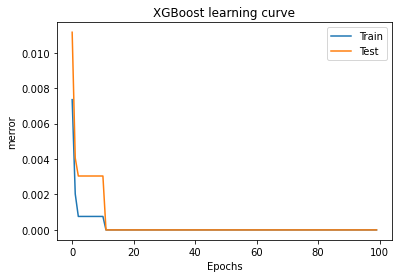

In [66]:
epochs = len(results['validation_0']['merror'])
x_axis = range(0, epochs)

fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['merror'], label='Train')
ax.plot(x_axis, results['validation_1']['merror'], label='Test')
ax.legend()
plt.xlabel('Epochs')
plt.ylabel('merror')
plt.title('XGBoost learning curve')
plt.show()


In [67]:
# Init classifier
model = xgb.XGBClassifier()
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, 
          y_train, 
          eval_set=eval_set,
          early_stopping_rounds=12,
          verbose=True)

[0]	validation_0-mlogloss:0.34799	validation_1-mlogloss:0.38950


/Users/guillechuma/miniconda3/envs/ml/lib/python3.10/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-mlogloss:0.26593	validation_1-mlogloss:0.30123
[2]	validation_0-mlogloss:0.20254	validation_1-mlogloss:0.23208
[3]	validation_0-mlogloss:0.15609	validation_1-mlogloss:0.18221
[4]	validation_0-mlogloss:0.11908	validation_1-mlogloss:0.14186
[5]	validation_0-mlogloss:0.09073	validation_1-mlogloss:0.11086
[6]	validation_0-mlogloss:0.06971	validation_1-mlogloss:0.08605
[7]	validation_0-mlogloss:0.05433	validation_1-mlogloss:0.06784
[8]	validation_0-mlogloss:0.04282	validation_1-mlogloss:0.05367
[9]	validation_0-mlogloss:0.03412	validation_1-mlogloss:0.04286
[10]	validation_0-mlogloss:0.02739	validation_1-mlogloss:0.03440
[11]	validation_0-mlogloss:0.02233	validation_1-mlogloss:0.02809
[12]	validation_0-mlogloss:0.01843	validation_1-mlogloss:0.02315
[13]	validation_0-mlogloss:0.01546	validation_1-mlogloss:0.01930
[14]	validation_0-mlogloss:0.01310	validation_1-mlogloss:0.01634
[15]	validation_0-mlogloss:0.01123	validation_1-mlogloss:0.01391
[16]	validation_0-mlogloss:0.00974

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)